In [79]:
import pandas as pd
import numpy as np 
import random 


random.seed(42)
np.random.seed(42)

products=["Laptop","Men_shoes","office_chair","watch","cook_tops","women_clothes","Monitor","winter_jacket","Engine_oil","pan","gloves"]

category_map={
"Laptop":"Electronics",
"Men_shoes": "Fashion",
"office_chair": "Office",
"watch": "Accessories",
"cook_tops": "Kitchen",
"women_clothes": "Fashion",
"Monitor": "Electronics",
"winter_jacket": "Winter wear",
"Engine_oil": "Automobile",
"gloves": "Winter wear",
"pan": "kitchen"
    
}

regions=["Asia", "Europe","North america", "Africa","South America", "Australia"]
warehouses = ["NYC", "texas", "California", "Chicago","Boston","LA"]
suppliers = ["Supplier_A", "Supplier_B", "Supplier_C", "Supplier_D"]
payment_methods = ["Credit Card", "Debit Card", "UPI", "Net Banking", "Wallet"]


In [81]:
N=1000
records=[]

for i in range(N):

    product=random.choice(products)
    category=category_map[product]
    region=random.choice(regions)
    warehouse=random.choice(warehouses)
    supplier=random.choice(suppliers)
    order_date= pd.to_datetime(np.random.choice(pd.date_range(start="2024-1-01", end="2025-1-01")))
    order_value= round(np.random.uniform(50,1000),2)
    shipping_cost= round(order_value* np.random.uniform(0.03,0.12),2)

    returned= np.random.choice([0,1],p=[0.9,0.1])
    delivery_days=np.random.randint(1,10)
    product_accepted=True
    if supplier=="Supplier_D" or returned== 1:
        product_accepted=False



    records.append(
        [product,category,region,warehouse,supplier,order_date, order_value,shipping_cost,returned,delivery_days,product_accepted])

columns=["product","category","region","warehouse","supplier","order_date", "order_value","shipping_cost","returned","delivery_days","product_accepted"]



df=pd.DataFrame(records,columns=columns)




In [83]:
df.head()

,product,category,region,warehouse,supplier,order_date,order_value,shipping_cost,returned,delivery_days,product_accepted
0,gloves,Winter wear,Asia,NYC,Supplier_C,2024-04-12,806.72,37.52,0,5,True
1,watch,Accessories,Europe,texas,Supplier_A,2024-04-12,473.54,18.47,0,5,True
2,gloves,Winter wear,Australia,Boston,Supplier_A,2024-04-09,185.72,16.45,0,8,True
3,pan,kitchen,Africa,NYC,Supplier_A,2024-10-20,50.74,6.05,0,6,True
4,Men_shoes,Fashion,Europe,texas,Supplier_A,2024-09-09,460.35,25.88,0,3,True


<function matplotlib.pyplot.show(close=None, block=None)>

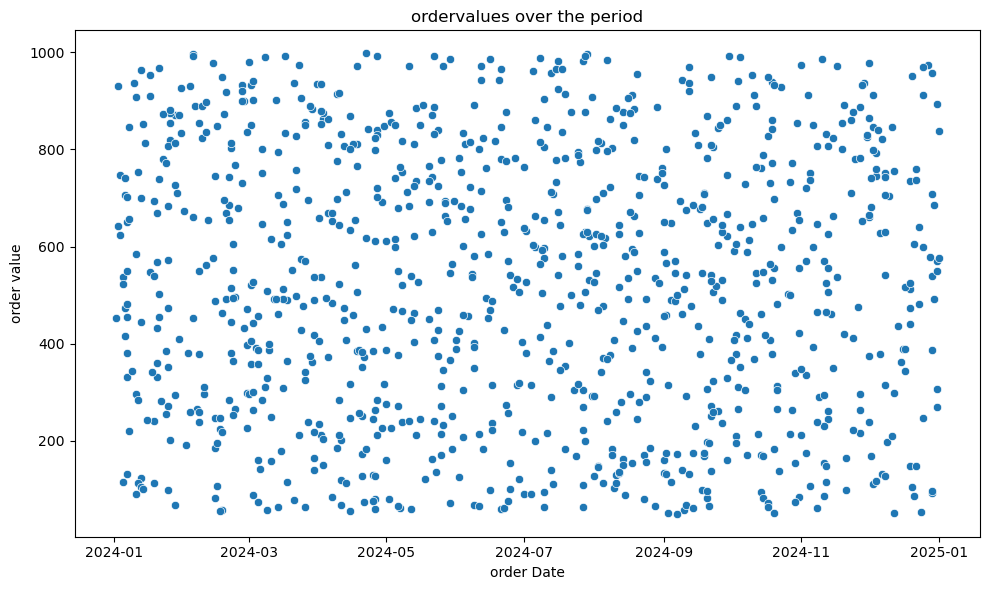

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,6))
sns.scatterplot(x='order_date',y='order_value', data=df)
plt.title("ordervalues over the period")
plt.xlabel("order Date")
plt.ylabel("order value")
plt.tight_layout()
plt.show

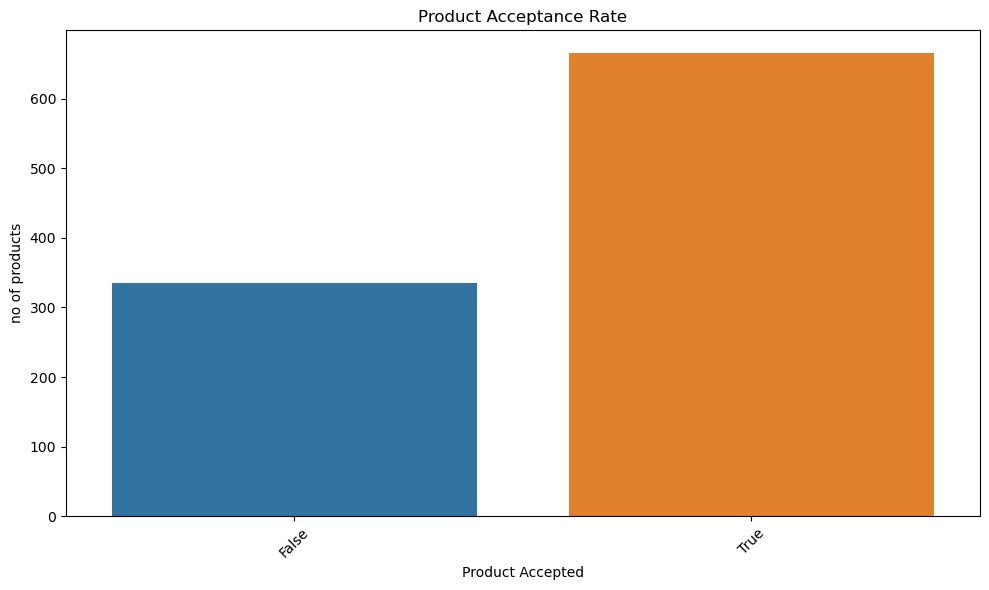

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x="product_accepted", data=df)
plt.title("Product Acceptance Rate")
plt.xlabel("Product Accepted")
plt.ylabel("no of products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
df.to_excel("fake_ecommerce_data.xlsx", index=False) 


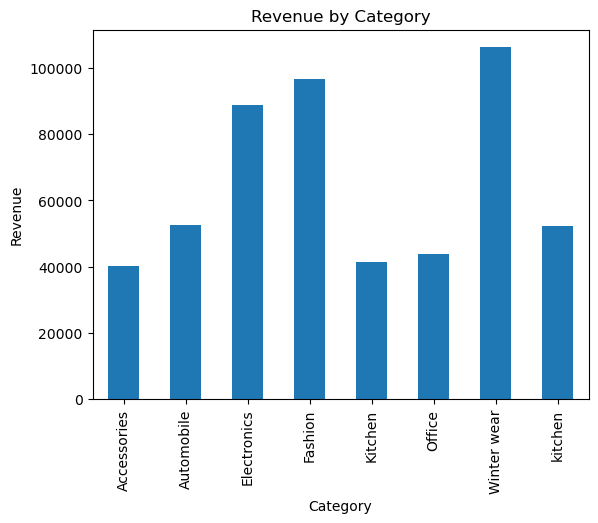

In [93]:
revenue_by_category = df.groupby("category")["order_value"].sum()
plt.figure()
revenue_by_category.plot(kind="bar")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()


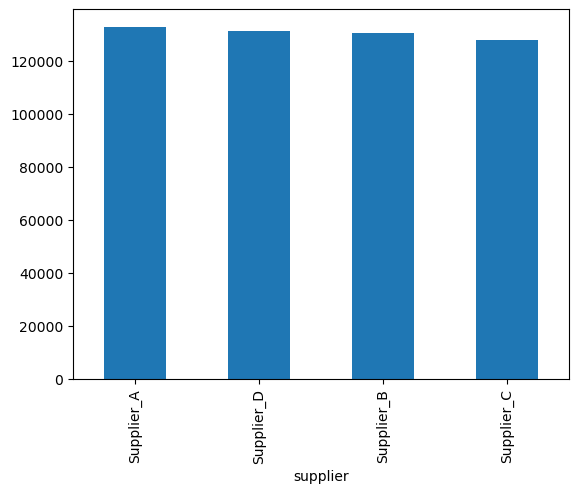

In [97]:
supplier_value=df.groupby("supplier")["order_value"].sum().nlargest(10)
plt.figure()
supplier_value.plot(kind='bar')
plt.show()



In [99]:
df.groupby("category")["order_value"].sum() / df["order_value"].sum() * 100


category
Accessories     7.717650
Automobile     10.085776
Electronics    16.997843
Fashion        18.515309
Kitchen         7.929752
Office          8.376336
Winter wear    20.346407
kitchen        10.030928
Name: order_value, dtype: float64

In [101]:
df["payment_method"].value_counts(normalize=True) * 100


KeyError: 'payment_method'